**Visualizing the simplex method in high dimensions**

We visualize a four-dimensional linear programming problem by finding all vertices of the feasible region, using principal component analysis to project into two dimensions, conduct the simplex algorithm to find the optimal solution, and visually display which vertices the simplex method visits.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from itertools import combinations

**Optimization Problem**

We use Exercise 2.1 from Vanderbei (22):
\begin{align*}
\text{maximize }6x_1 + 8x_2 + 5x_3 + 9x_4\\
\text{subject to } 2x_1 + x_2 + x_3 + 3x_4 ≤ 5\\
x_1+3x_2+ x_3+2x_4 ≤3\\
x_1, x_2, x_3, x_4 ≥ 0
\end{align*}
This problem was examined in lecture on 17 Jan 2024.  
As it is a four-dimensional problem, it is difficult to visualize. We attempt to use PCA to project the problem to 2 dimensions, where it is easier to visualize.

**Problem setup**

We set up the problem in matrix form.

In [2]:
A = np.array([[2,1,1,3],[1,3,1,2]])
b = np.array([5,3])
c = np.array([6,8,5,9])

m,n = A.shape
I = np.eye(m)
T = np.vstack([ np.hstack([A,I,b.reshape((m,1))]) , np.hstack([c,np.zeros(m+1)]) ])
print(T)

[[2. 1. 1. 3. 1. 0. 5.]
 [1. 3. 1. 2. 0. 1. 3.]
 [6. 8. 5. 9. 0. 0. 0.]]


**Calculating all vertices**

We calculate all vertices of the feasible region.  
There are ${6 \choose 2} = 15$ vertices.  
Each vertex corresponds to a choice of 4 basic (nonzero) variables.  
We use the function `combinations` from the `itertools` package to iterate through all possible choices of 2 out of 6 variables.
Each combination corresponds to a vertex. 
We use a masking array to indicate whether or not a vertex is within the feasible region (has only positive variable values).

In [4]:
x = range(6) # vector representing variables 
V = np.zeros((15,6))

i = 0
combos = combinations(x,2) #  all possible sets of basic variables
for basic in combos: # iterates through all possible sets of basic variables
    u = la.solve(T[0:m,basic],b) # solve for the 2 nonzero variables
    V[i,basic] = u.flatten() # store values in matrix V
    i+=1

feasible = np.all(V >= 0,axis=1)
print(V.round(2))

[[  2.4    0.2    0.     0.     0.     0.  ]
 [  2.     0.     1.     0.     0.     0.  ]
 [  1.     0.     0.     1.     0.     0.  ]
 [  3.     0.     0.     0.    -1.     0.  ]
 [  2.5    0.     0.     0.     0.     0.5 ]
 [  0.    -1.     6.     0.     0.     0.  ]
 [  0.    -0.14   0.     1.71   0.     0.  ]
 [  0.     1.     0.     0.     4.     0.  ]
 [  0.     5.     0.     0.     0.   -12.  ]
 [  0.     0.    -1.     2.     0.     0.  ]
 [  0.     0.     3.     0.     2.     0.  ]
 [  0.     0.     5.     0.     0.    -2.  ]
 [  0.     0.     0.     1.5    0.5    0.  ]
 [  0.     0.     0.     1.67   0.    -0.33]
 [  0.     0.     0.     0.     5.     3.  ]]


**Visualizing vertices**

We perform principal component analysis using singular value decomposition on the matrix and take the first 2 principal components.  
Reference: https://ubcmath.github.io/MATH307/notebooks/07_pca.html
[course notes from MATH 307]

In [5]:
Vc = V - V.mean(axis=0) # normalize V
P, S, QT = la.svd(Vc)
print(P.shape,S.shape,QT.shape)

(15, 15) (6,) (6, 6)


The rows of QT are the weight vectors.  
To get the projection of V into two dimensions, we take the first two rows of QT and multiply with Vc.

In [7]:
V2D = Vc @ QT[0:2,:].T
print(V2D)

[[-0.65815877 -0.97316915]
 [-0.73137252  0.07046997]
 [-0.68758826 -0.8974873 ]
 [-0.61101776 -0.89846362]
 [-1.19466432 -0.98122542]
 [-1.09744124  5.28866554]
 [-0.70860932 -0.84342884]
 [-0.84672281 -1.27199124]
 [12.21797449 -0.77981858]
 [-0.643804   -1.86544457]
 [-0.97208203  2.00833715]
 [ 1.12179471  4.27725152]
 [-0.7258735  -0.89699914]
 [-0.34953754 -0.84166189]
 [-4.11289713 -1.39503441]]


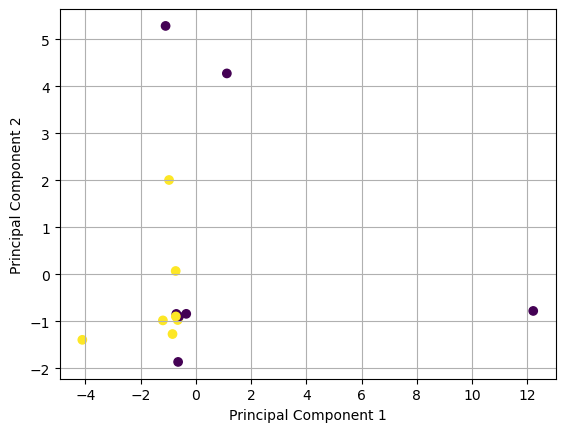

In [8]:
plt.scatter(V2D[:,0],V2D[:,1],c=feasible)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

Feasible vertices are marked in yellow, and infeasible vertices are marked in purple.

We construct a dictionary which has the sets of basic variables as keys, and the corresponding coordinates in V2D as values.

In [9]:
# construct a dictionary of vertex values for each basic variable
vdict = {}
i = 0
for basic in combinations(x,2): # iterates through all possible sets of basic variables
    vdict[basic] = V2D[i,:]
    i+=1

print(vdict)

{(0, 1): array([-0.65815877, -0.97316915]), (0, 2): array([-0.73137252,  0.07046997]), (0, 3): array([-0.68758826, -0.8974873 ]), (0, 4): array([-0.61101776, -0.89846362]), (0, 5): array([-1.19466432, -0.98122542]), (1, 2): array([-1.09744124,  5.28866554]), (1, 3): array([-0.70860932, -0.84342884]), (1, 4): array([-0.84672281, -1.27199124]), (1, 5): array([12.21797449, -0.77981858]), (2, 3): array([-0.643804  , -1.86544457]), (2, 4): array([-0.97208203,  2.00833715]), (2, 5): array([1.12179471, 4.27725152]), (3, 4): array([-0.7258735 , -0.89699914]), (3, 5): array([-0.34953754, -0.84166189]), (4, 5): array([-4.11289713, -1.39503441])}


**Applying the simplex method**

We perform the simplex method to find the optimal solution.  
The code for the pivot function is referenced from lecture.

In [10]:
def pivot(T,k,l):
    E = np.eye(T.shape[0])
    E[:,l] = -T[:,k]/T[l,k]
    E[l,l] = 1/T[l,k]
    return E@T

print(T)

[[2. 1. 1. 3. 1. 0. 5.]
 [1. 3. 1. 2. 0. 1. 3.]
 [6. 8. 5. 9. 0. 0. 0.]]


We perform the simplex method, recording the transformed coordinates of each visited vertex.  
We use the rule to always take the entering variable with the largest coefficient in the current function.

In [11]:
visited = np.array([vdict[(4,5)]]) # initial basic variables are the slack variables
T1 = pivot(T,3,1) # x3 enters the basis, x5 leaves the basis
basic = (3,4) 
print(T1.round(2))
print(vdict[basic])
visited = np.append(visited,[vdict[basic]],axis=0)

[[  0.5  -3.5  -0.5   0.    1.   -1.5   0.5]
 [  0.5   1.5   0.5   1.    0.    0.5   1.5]
 [  1.5  -5.5   0.5   0.    0.   -4.5 -13.5]]
[-0.7258735  -0.89699914]


In [12]:
T2 = pivot(T1,0,0) # x0 enters, x3 leaves
basic = (0,4)
print(T2.round(2))
print(vdict[basic])
visited = np.append(visited,[vdict[basic]],axis=0)

[[  1.  -7.  -1.   0.   2.  -3.   1.]
 [  0.   5.   1.   1.  -1.   2.   1.]
 [  0.   5.   2.   0.  -3.   0. -15.]]
[-0.61101776 -0.89846362]


In [13]:
T3 = pivot(T2,1,1) #x1 enters, x4 leaves
basic = (0,1) 
print(T3.round(2))
print(vdict[basic])
visited = np.append(visited,[vdict[basic]],axis=0)

[[  1.    0.    0.4   1.4   0.6  -0.2   2.4]
 [  0.    1.    0.2   0.2  -0.2   0.4   0.2]
 [  0.    0.    1.   -1.   -2.   -2.  -16. ]]
[-0.65815877 -0.97316915]


In [14]:
T4 = pivot(T3,2,1) #x2 enters, x1 leaves
basic = (0,2)
print(T4.round(2))
print(vdict[basic])
visited = np.append(visited,[vdict[basic]],axis=0)

[[  1.  -2.   0.   1.   1.  -1.   2.]
 [  0.   5.   1.   1.  -1.   2.   1.]
 [  0.  -5.   0.  -2.  -1.  -4. -17.]]
[-0.73137252  0.07046997]


In [15]:
visited

array([[-4.11289713, -1.39503441],
       [-0.7258735 , -0.89699914],
       [-0.61101776, -0.89846362],
       [-0.65815877, -0.97316915],
       [-0.73137252,  0.07046997]])

We have reached an optimal vertex.  
We plot the sequence of visited vertices (cropping the graph to show only the feasible vertices).

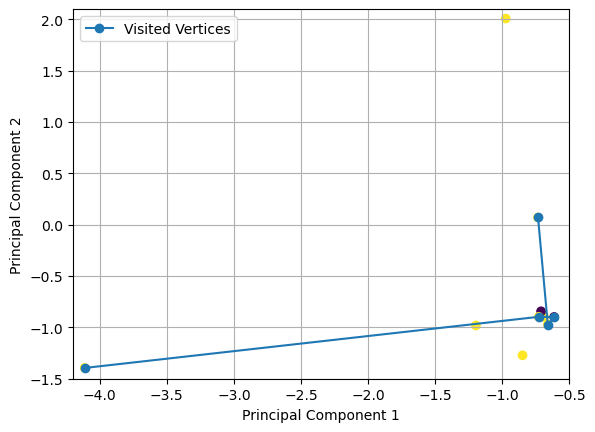

In [28]:
plt.scatter(V2D[:,0],V2D[:,1],c=feasible)
plt.plot(visited[:,0],visited[:,1],'o-',label="Visited Vertices") 
#plt.scatter(visited[0,0],visited[0,1],color='red',label='Initial Vertex')
#plt.scatter(visited[-1,0],visited[-1,1],color='green',label='Optimal Vertex')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.xlim(-4.2,-0.5)
plt.ylim(-1.5,2.1)
plt.grid()
plt.show()

The sequence of visited vertices is indicated in blue. The 

**References**

*MATH 307 Applied Linear Algebra*, University of British Columbia Department of Mathematics, 2022, https://ubcmath.github.io/MATH307/. Accessed 1 February 2024.  
Vanderbei, Robert J. *Linear Programming: Foundations and Extensions*. 5th ed. Springer, 2020.  
Walls, Patrick. "Simplex Method". Math 441. Mathematical Modelling: Discrete Optimization Problems. 17 January 2024, University of British Columbia. Lecture.